* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [61]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import seaborn as sns

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM lifeexpectancy', con=engine)

engine.dispose()

In [3]:
df = pd.concat([df,pd.get_dummies(df['Status'], drop_first=True)], axis=1)
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developing'],
      dtype='object')

In [4]:
cols = df.columns

numeric_cols = [x for x in cols if x not in ('Country','Year','Status')]

unique_country = df['Country'].unique()

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [7]:
#counting null values in each column
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developing                           0
dtype: int64

In [8]:
df['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [9]:
#addressing missing values
for country in unique_country:
    df.loc[df['Country'] == country, numeric_cols] = df.loc[df['Country'] == country, numeric_cols].interpolate()

df = df.dropna()

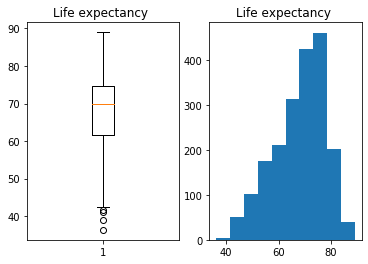

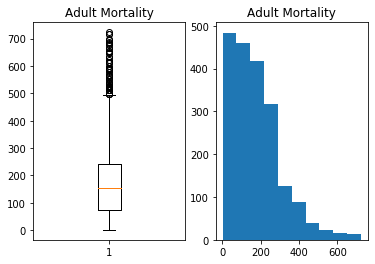

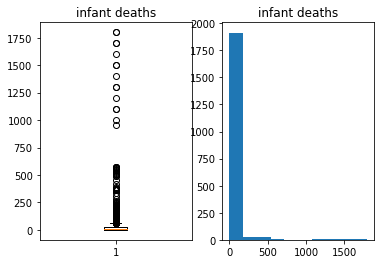

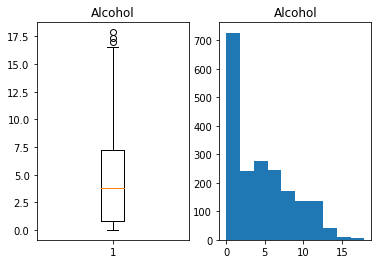

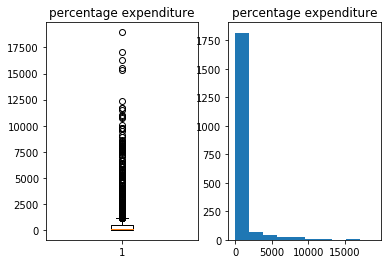

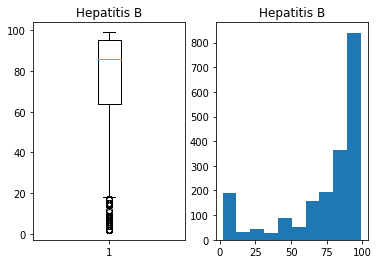

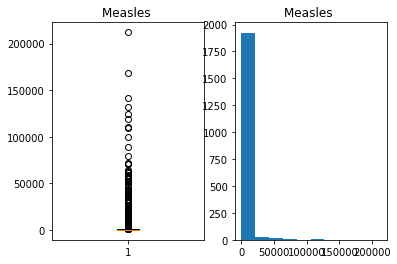

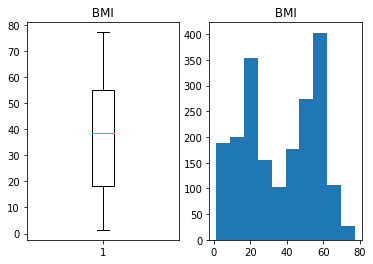

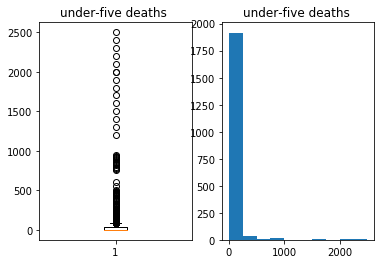

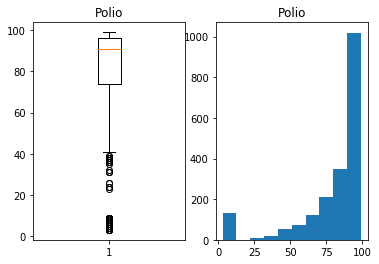

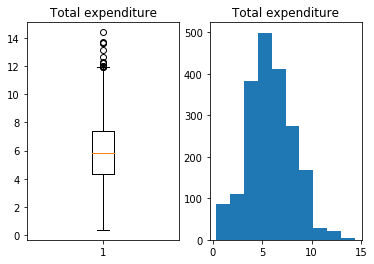

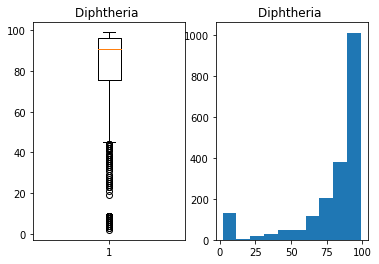

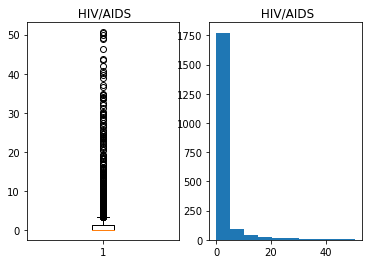

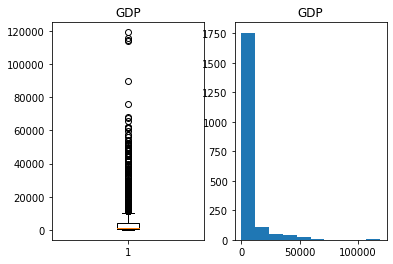

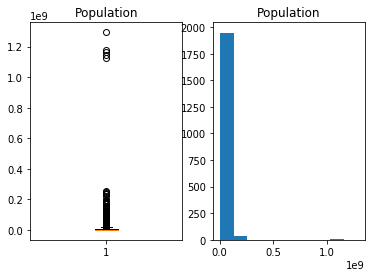

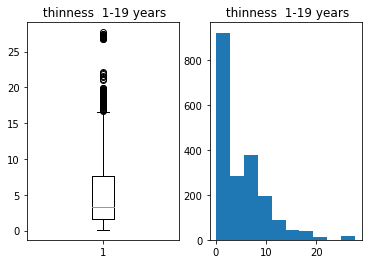

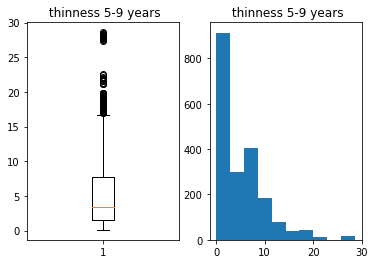

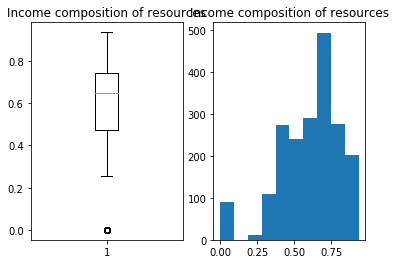

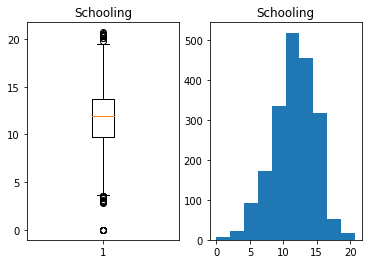

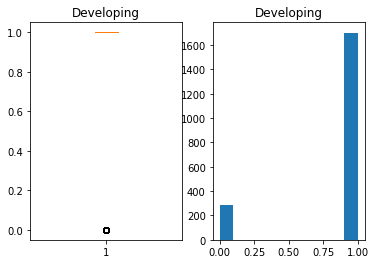

In [10]:
for i in numeric_cols:
    plt.subplot(1,2,1)
    plt.boxplot(df[i].dropna())
    plt.title(i)
    plt.subplot(1,2,2)
    plt.hist(df[i])
    plt.title(i)
    plt.show()

By examining the above graphs for each column, reading through the kaggle descriptions and doing a quick google-search sanity check, it becomes clear that some columns are completely unreliable. The first columns that should be dropped because they cannot be easily fixed or salvaged or because the data is very unclear or untrustworthy should be the BMI and GDP columns. The BMI column reports that more than half of our datapoints are in the "extreme obesity" range defined as having a BMI > 40. 

https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf

The percent expenditure column is also unclear and provides similar information to tthe Total expenditure column which has more reasonable values. For this reason we will drop percent expenditure and rely on the Total expenditure column. 

In [11]:
df = df.drop(['GDP', ' BMI ', 'percentage expenditure'], axis=1)

The Kaggle description of the dataset reports that the Measles column is reported for every 1000 population. This does not make any sense as many of the values significantly exceed a value of 1000. The measles column will instead be evaluated as a total for its given year. In this context the values are much more reasonable. Although they do not match exactly, the measles values are more believable especially when compared to values reported by documentation provided by the WHO and CDC:

https://www.who.int/immunization/diseases/measles/mri_annual-report_2013.pdf?ua=1

https://www.cdc.gov/measles/downloads/MeaslesDataAndStatsSlideSet.pdf

The "Thinness 1-19" column is incorrectely labeled and is referred to as the "Thinness 10-19" column in the Kaggle description. This change will also be made. 

In [12]:
df = df.rename(columns={"Measles ": "Measles Tot",  
                        " thinness  1-19 years": "thinnes 10-19 years"})

In [13]:
#Comparing highest values of Measles in year 2000 to WHO data
df.loc[(df['Measles Tot'] > df['Measles Tot'].quantile(.9)) & (df['Year'] == 2000)].sort_values(by='Measles Tot', ascending=False).head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles Tot,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinnes 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
1909,Nigeria,2000,Developing,47.1,45.0,576,9.23,18.0,212183,943,31.0,2.84,29.0,4.9,1223529.0,14.3,14.4,0.000,7.6,1
575,China,2000,Developing,71.7,115.0,490,3.06,6.0,71093,608,86.0,4.60,85.0,0.1,1262645.0,5.9,5.1,0.583,9.5,1
2729,Uganda,2000,Developing,46.6,554.0,116,10.47,29.0,42554,191,55.0,6.77,52.0,11.6,2439274.0,7.0,7.0,0.382,9.8,1
1202,India,2000,Developing,62.5,224.0,1800,0.93,6.0,38835,2500,57.0,4.26,58.0,0.3,1535912.0,27.7,28.6,0.489,8.3,1
1570,Madagascar,2000,Developing,57.9,283.0,44,1.16,51.0,35256,68,58.0,5.80,57.0,0.6,1576686.0,8.7,8.6,0.000,8.0,1


The values reported for under-five deaths are also unreasonable, especially because the data-set claims that the values are reported for per 1000 population. Because These values are likely very important to our target variable and only about 5% of the values are completely unreasonable these values will be winsorized so that we can get some information out of them. The cut off will be chosen around 5% because when compared to another dataset we can see that at this point the values start to become more believable. 

http://hdr.undp.org/en/content/under-five-mortality-rate-1000-live-births

In [14]:
#Examining highest reported IMR rates 
df.loc[df['under-five deaths '] > df['under-five deaths '].quantile(.96)].sort_values(by='under-five deaths ', ascending=False)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles Tot,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinnes 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
1202,India,2000,Developing,62.5,224.0,1800,0.93,6.0,38835,2500,57.0,4.26,58.0,0.3,1.535912e+06,27.7,28.6,0.489,8.3,1
1201,India,2001,Developing,62.9,222.0,1800,1.00,6.0,51780,2400,58.0,4.50,59.0,0.3,1.714779e+08,27.5,28.5,0.494,8.3,1
1200,India,2002,Developing,63.3,219.0,1700,1.10,6.0,40044,2300,58.0,4.40,59.0,0.3,1.898711e+07,27.4,28.4,0.499,8.4,1
1199,India,2003,Developing,63.7,216.0,1700,1.19,6.0,47147,2200,57.0,4.30,61.0,0.3,1.182785e+07,27.3,28.3,0.505,8.6,1
1198,India,2004,Developing,64.0,214.0,1600,1.20,6.0,55443,2100,58.0,4.22,63.0,0.3,1.126136e+09,27.2,28.2,0.518,9.2,1
1197,India,2005,Developing,64.4,211.0,1500,1.27,8.0,36711,2000,65.0,4.28,65.0,0.3,1.144119e+09,27.2,28.1,0.526,9.4,1
1196,India,2006,Developing,64.8,28.0,1500,1.37,6.0,64185,2000,66.0,4.25,65.0,0.3,1.161978e+09,27.1,28.0,0.536,9.7,1
1195,India,2007,Developing,65.2,26.0,1400,1.59,6.0,41144,1900,67.0,4.23,64.0,0.3,1.179681e+09,27.1,28.0,0.546,9.9,1
1194,India,2008,Developing,65.5,23.0,1300,1.93,29.0,44258,1800,69.0,4.34,7.0,0.3,1.197147e+08,27.0,27.9,0.556,10.2,1
1193,India,2009,Developing,66.0,2.0,1300,2.50,37.0,56188,1700,73.0,4.38,74.0,0.2,1.214271e+08,27.0,27.8,0.563,10.5,1


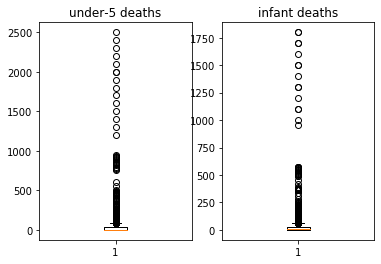

In [15]:
plt.subplot(1,2,1)
plt.boxplot(df['under-five deaths '])
plt.title('under-5 deaths')

plt.subplot(1,2,2)
plt.boxplot(df['infant deaths'])
plt.title('infant deaths')
plt.show()

In [16]:
df['under-five deaths '] = winsorize(df['under-five deaths '], (0, .05))
df['infant deaths'] = winsorize(df['infant deaths'], (0, .05))

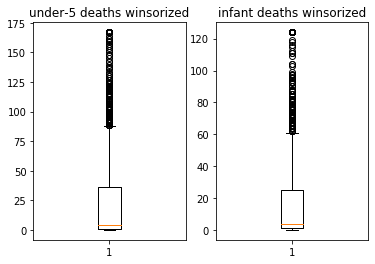

In [17]:
plt.subplot(1,2,1)
plt.boxplot(df['under-five deaths '])
plt.title('under-5 deaths winsorized')

plt.subplot(1,2,2)
plt.boxplot(df['infant deaths'])
plt.title('infant deaths winsorized')
plt.show()

In [18]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles Tot,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinnes 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
Year,1.000000,0.171485,-0.072108,-0.047711,-0.046859,0.247259,-0.099554,-0.058038,0.117642,0.074139,0.166006,-0.142581,0.022775,-0.047477,-0.053483,0.242900,0.225046,-0.001429
Life expectancy,0.171485,1.000000,-0.660529,-0.410675,0.392617,0.249625,-0.138133,-0.461193,0.415188,0.199288,0.442943,-0.576373,-0.010840,-0.458724,-0.450095,0.726753,0.744703,-0.457526
Adult Mortality,-0.072108,-0.660529,1.000000,0.208837,-0.181469,-0.103382,-0.007269,0.238455,-0.208006,-0.096727,-0.210136,0.536273,-0.022403,0.278842,0.284581,-0.411010,-0.404160,0.286394
infant deaths,-0.047711,-0.410675,0.208837,1.000000,-0.249455,-0.188157,0.466698,0.991867,-0.281681,-0.213784,-0.268520,0.102836,0.327452,0.438187,0.443242,-0.322295,-0.432761,0.241069
Alcohol,-0.046859,0.392617,-0.181469,-0.249455,1.000000,0.106383,-0.029252,-0.256182,0.239854,0.227108,0.245454,-0.033756,-0.025556,-0.398731,-0.387087,0.532173,0.590261,-0.609023
Hepatitis B,0.247259,0.249625,-0.103382,-0.188157,0.106383,1.000000,-0.142059,-0.196138,0.451299,0.130435,0.552732,-0.104034,-0.092418,-0.166903,-0.181161,0.239386,0.268951,-0.108175
Measles Tot,-0.099554,-0.138133,-0.007269,0.466698,-0.029252,-0.142059,1.000000,0.461931,-0.113574,-0.111638,-0.119828,0.019600,0.269840,0.227961,0.223325,-0.137648,-0.146625,0.078270
under-five deaths,-0.058038,-0.461193,0.238455,0.991867,-0.256182,-0.196138,0.461931,1.000000,-0.308386,-0.205478,-0.297963,0.128030,0.304290,0.443592,0.445353,-0.359904,-0.474823,0.242547
Polio,0.117642,0.415188,-0.208006,-0.281681,0.239854,0.451299,-0.113574,-0.308386,1.000000,0.153724,0.680436,-0.132156,-0.026926,-0.204346,-0.205516,0.395265,0.437793,-0.228542
Total expenditure,0.074139,0.199288,-0.096727,-0.213784,0.227108,0.130435,-0.111638,-0.205478,0.153724,1.000000,0.166398,0.025389,-0.078289,-0.233957,-0.249369,0.194385,0.256340,-0.221800


From the above analysis we can see that the only neutrally correlated variable with life expectancy is the population, which has only a slight negative correlation of -.01.

Variables that are negatively correlated with life expectancy are Adult mortality (-.66), infant deaths (-.41), Measles Total (-.13), Under-5 deaths (-.46), HIV/AIDS (-.57), living in a developing country (-.45) and both thinness variabls (-.45).

The variables that are positively correlated with life expectancy are the Year (.17), Hep B Vaxinations (.24), Polio Vainations .41), Total expenditure (.19), Diptheria Vaxinations (.44), Income composition of resources (.72), schooling (.74) and most surprisingly alcohol (.39).

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 


Above we saw that there were plenty of missing values. This dataset has a time series aspect and thus it was appropriate to use a linear interpolation based on the country in question. This was done to fill in gaps in the data where possible and later the values that could not be interpolated were dropped. There were numerous questionable values present in the data that might have stemmed from data collection. Examples of these problems can be seen in the original values for GDP, BMI, Percent Expenditure, Measles, and Under-5 mortality. Each of these variables was handled differently. After exploring the data and performing a sanity check against other sources of similar data it was found that the GDP reported values, BMI and Percent Expenditure were variables that could not be salvaged because it was not clear how the data was altered. These variables were dropped for that reason. Measles and Under-5 mortality were reported per 1000 population according to the Kaggle description. For Measles it was decided that this was likely an error and was meant to be reported as total measles cases in that given year. This was based on values found in CDC and WHO resources that are linked above. The variable was considered as a total value instead of the reported value. The under-5 values had significant outliers that had to be winsorized to more believable values. This was done because the reported values were per 1000 population but tended to significantly exceed the value of 1000. The winsorization was not perfect and likely skews our data to be less representative of reality but the column was kept because it seemed very relevant to the life expectancy target variable. The winsorization was done based on values that were found in another resource but was not perfect because it capped all the excessive values at the same point while in reality the countries likely had very different values. This was done as only about 5% of the data was unbelievable and the rest seemed plausible, so any skew that occurs in our data is likely to be small. 


* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.


We can get a good sense of the distribution of our data by visually examining the histograms made above. We can see that the Schooling variable has the most normal distribution. Life expectancy and Income composition of resources look like Beta distributions. We can see that the Total expenditure variable is similar to a Gamma distribution. Both thinness variables and the adult mortality variable are most similar to exponential distributions, while all the vaxination variables (Hep B, Polio, and Diptheria) all have a similar distribution that looks exponential starting from the right side with a small exception on the far left where there are a significant number of counts.

In [19]:
#checking for countries that are missing years of reported values
df_country = df.groupby('Country')

for country in unique_country:
    counts = len(df.loc[df['Country'] == country])
    print('{} reported values for {}'.format(counts, country))

16 reported values for Afghanistan
16 reported values for Albania
15 reported values for Algeria
0 reported values for Côte d'Ivoire
15 reported values for Angola
0 reported values for Antigua and Barbuda
15 reported values for Argentina
15 reported values for Armenia
15 reported values for Australia
15 reported values for Austria
15 reported values for Azerbaijan
0 reported values for Bahamas
0 reported values for Bahrain
15 reported values for Bangladesh
0 reported values for Barbados
15 reported values for Belarus
15 reported values for Belgium
15 reported values for Belize
15 reported values for Benin
15 reported values for Bhutan
0 reported values for Bolivia (Plurinational State of)
15 reported values for Bosnia and Herzegovina
15 reported values for Botswana
15 reported values for Brazil
0 reported values for Brunei Darussalam
15 reported values for Bulgaria
15 reported values for Burkina Faso
15 reported values for Burundi
15 reported values for Cabo Verde
15 reported values fo

In [20]:
df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles Tot,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinnes 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
count,1987,1987.000000,1987,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.984902,NaN,67.981782,175.187217,19.648213,4.455644,73.86160,2729.561651,27.653246,80.371917,5.902728,80.454454,2.274937,1.358390e+07,5.129995,5.199346,0.603453,11.639054,0.856568
std,NaN,4.323147,NaN,9.706401,131.616942,32.032092,3.976733,29.02807,12102.389143,45.031957,24.363376,2.287467,24.450153,6.005112,6.490113e+07,4.750149,4.844382,0.206026,3.212964,0.350601
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,2.00000,0.000000,0.000000,3.000000,0.370000,2.000000,0.100000,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,NaN,2003.000000,NaN,61.700000,75.000000,1.000000,0.830000,64.00000,0.000000,1.000000,74.000000,4.360000,75.500000,0.100000,1.967480e+05,1.600000,1.600000,0.473000,9.700000,1.000000
50%,NaN,2007.000000,NaN,69.900000,153.000000,4.000000,3.770000,86.00000,20.000000,4.000000,91.000000,5.800000,91.000000,0.100000,1.396861e+06,3.300000,3.400000,0.648000,11.900000,1.000000
75%,NaN,2011.000000,NaN,74.700000,243.000000,25.000000,7.190000,95.00000,499.500000,36.000000,96.000000,7.385000,96.000000,1.400000,7.625918e+06,7.600000,7.700000,0.745000,13.700000,1.000000


From the data above we can examine the reported mean values for each column to get a sense of the central tendency of each. We can see for example that the life expectancy data has a central tendency of 69.2 years, Polio vaxinations have a central tendency of 82.3% and the Total expenditure of countries on healthcare has a central tendency of 5.9%.  

Similarly we can take a look at the std column to understand how much variation we have in these columns. For example the std of our life expectancy is 9.5 years, Polio vaxinations have a standard deviation of 23.6% and the total expenditure on healthcare has a standard deviation of 2.5%.

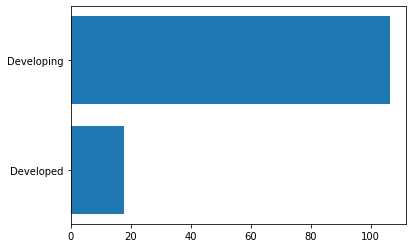

In [21]:
plt.barh(df.groupby('Status')['Country'].count().index,
       df.groupby('Status')['Country'].count()/16)
plt.show()

Above we can see that a large majority of the countries that we are considering are still developing. This helps to explain why so many countries have such low life expectancies. These values tend to influence our overall values and impact the values that we have reported for our central tendencies and devations. 

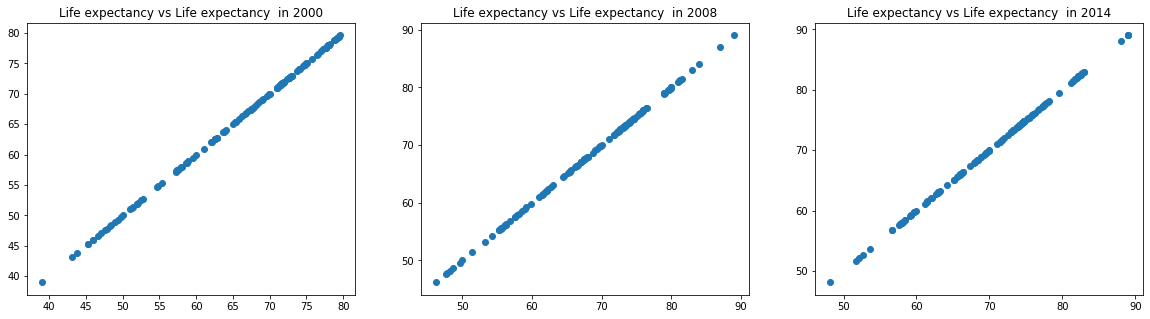

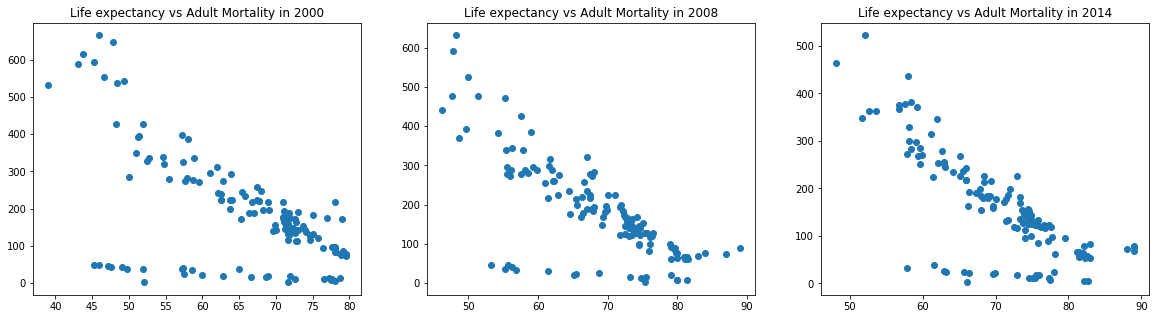

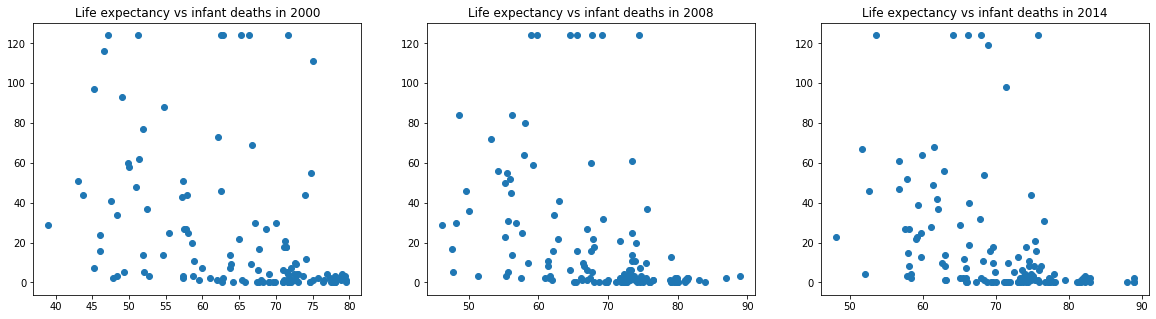

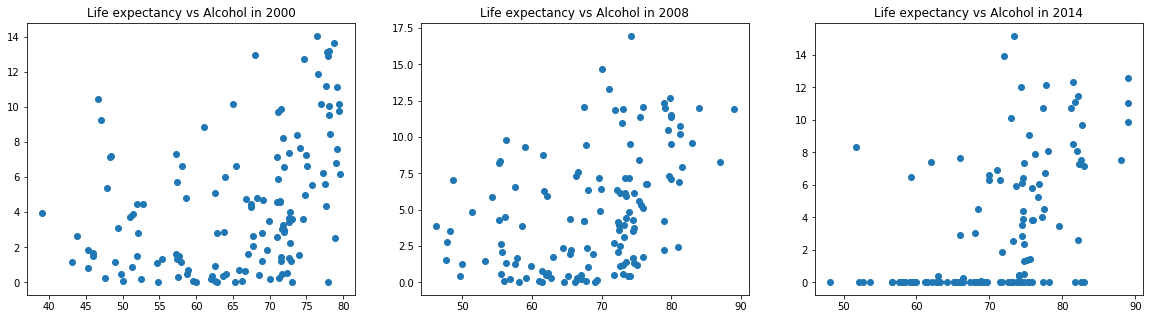

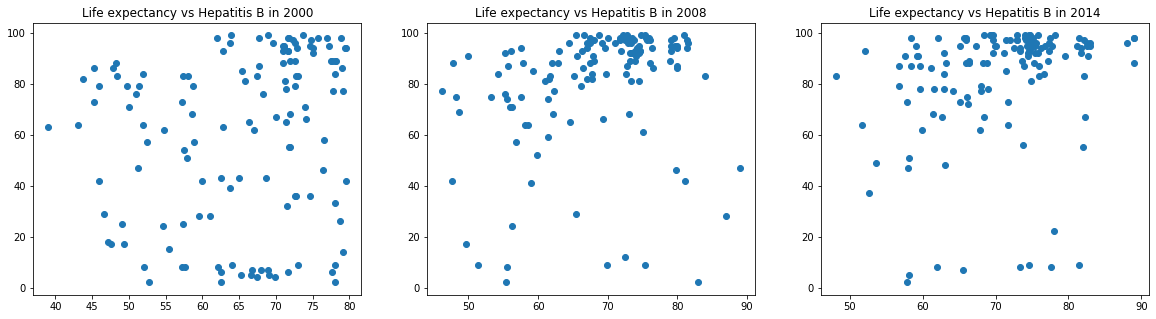

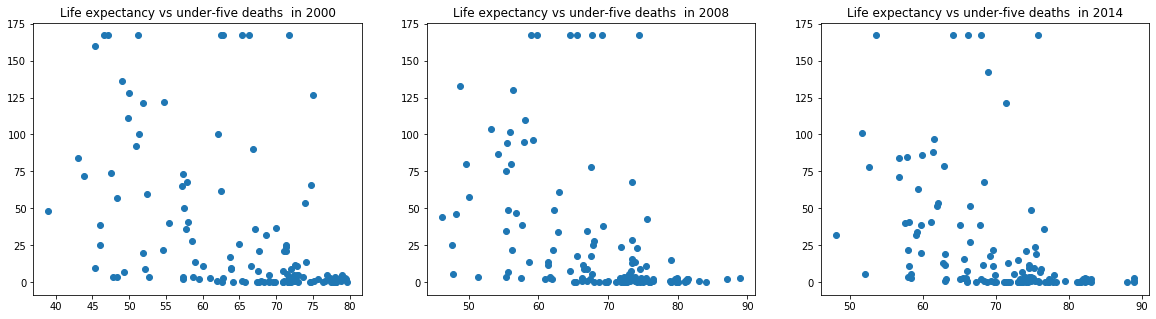

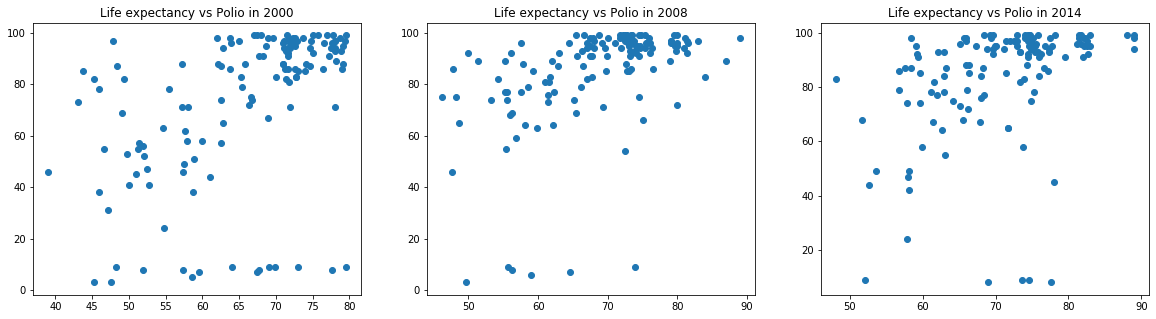

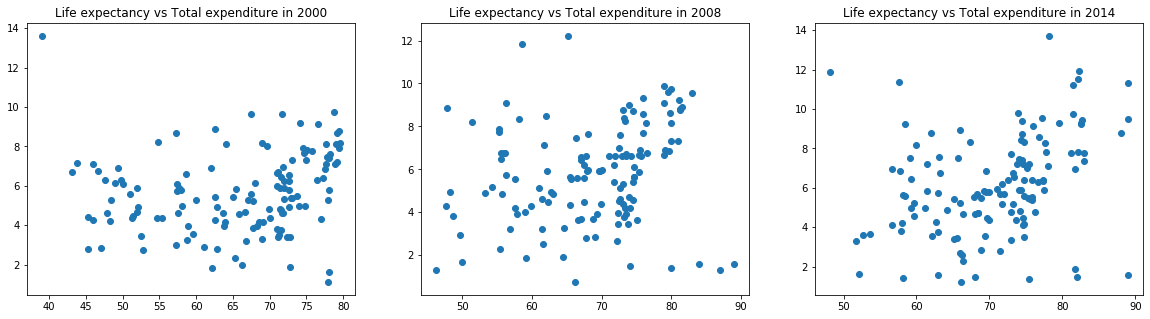

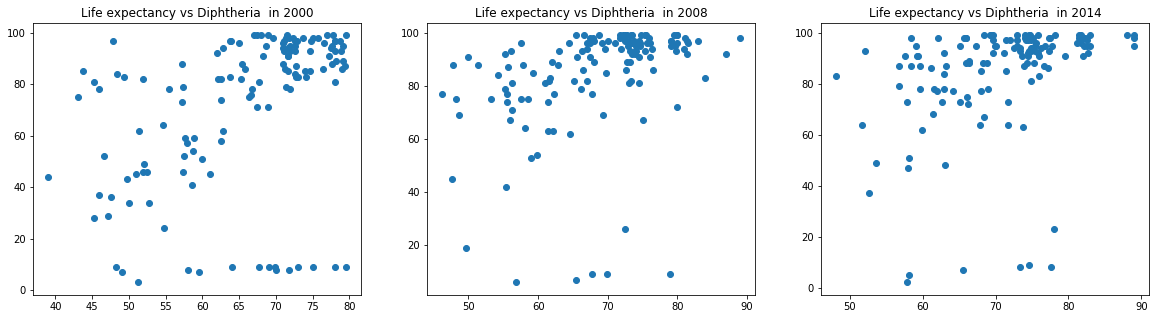

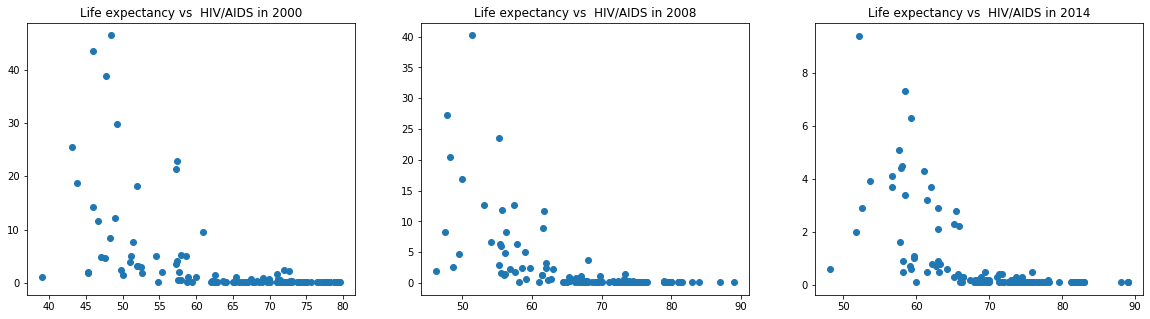

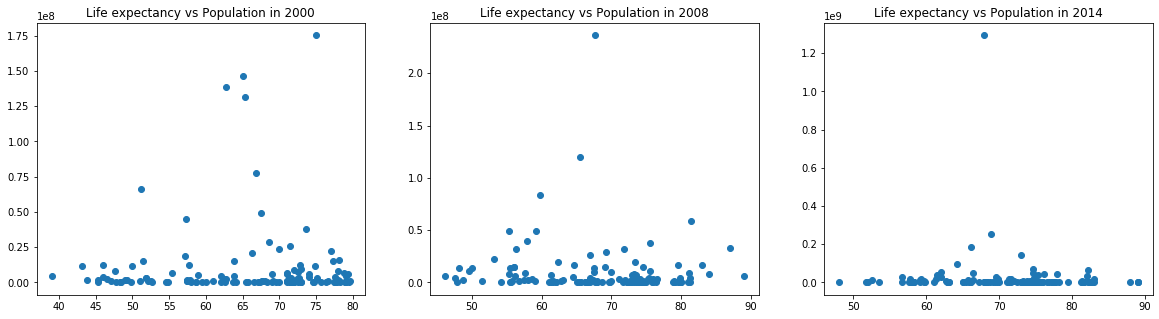

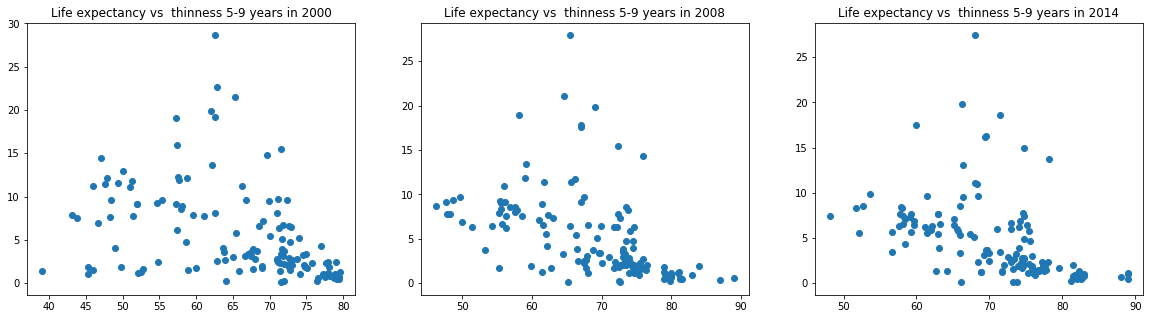

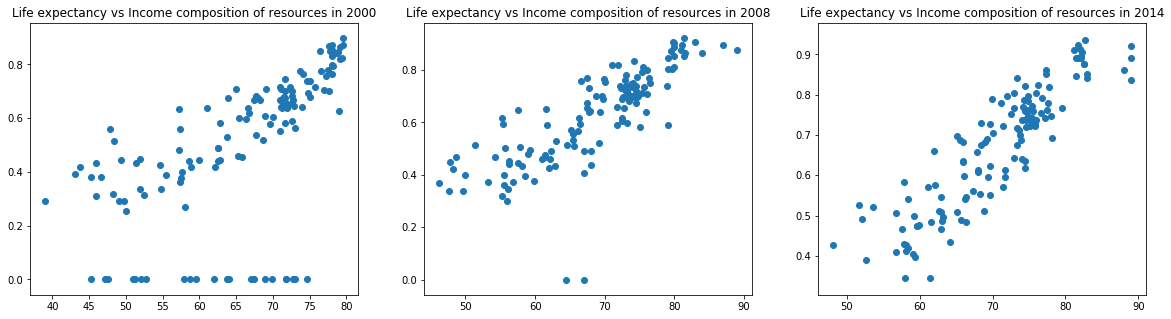

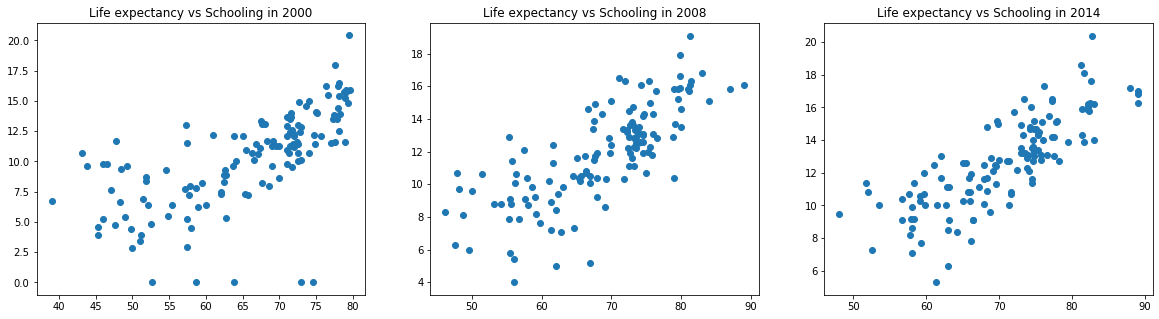

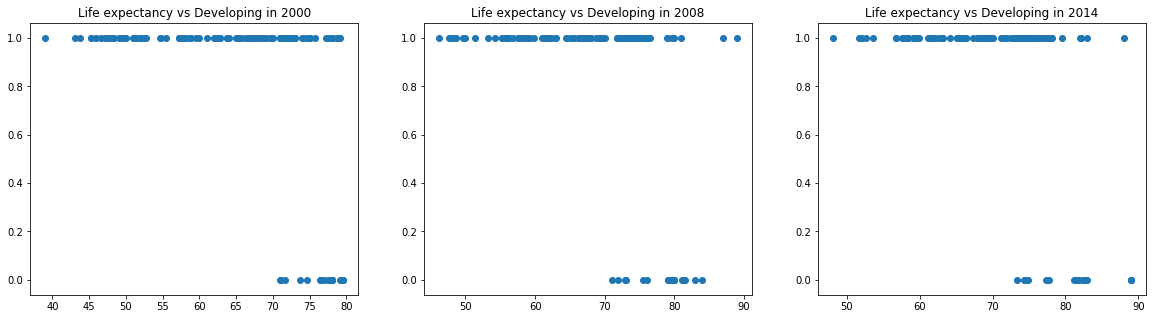

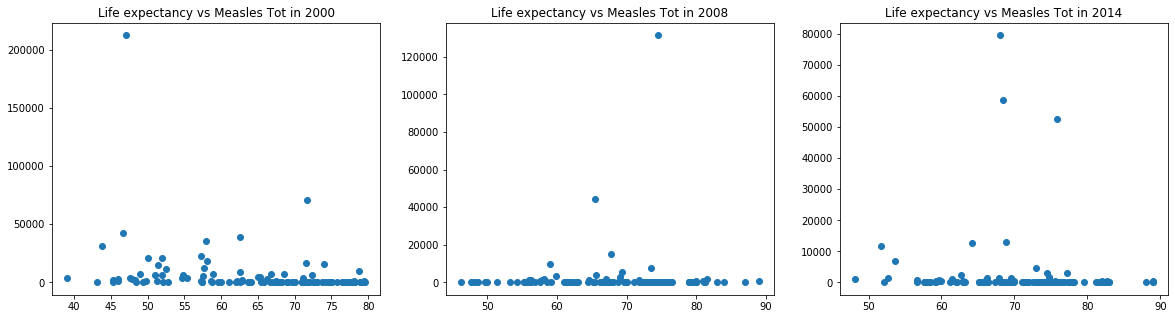

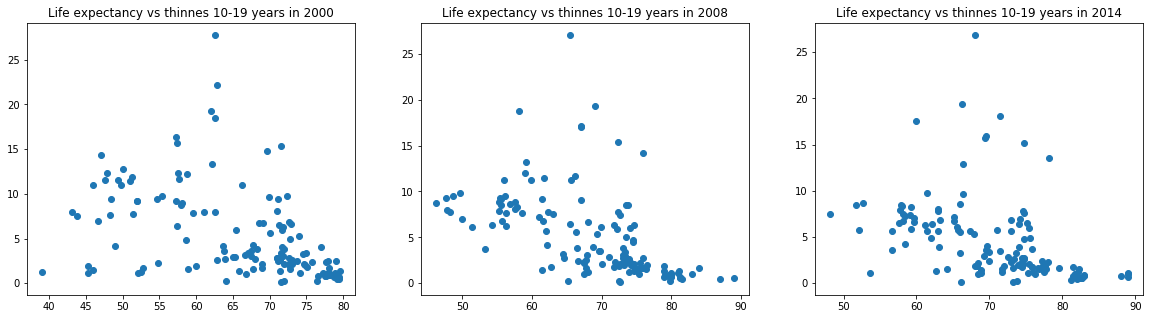

In [22]:
numeric_cols = [x for x in cols if x not in ('Country','Year','Status','GDP', ' BMI ', 'percentage expenditure', 'Measles ', ' thinness  1-19 years')]
numeric_cols.append('Measles Tot')
numeric_cols.append('thinnes 10-19 years')

df_2000 = df.loc[df['Year'] == 2000]
df_2008 = df.loc[df['Year'] == 2008]
df_2014 = df.loc[df['Year'] == 2014]

for col in numeric_cols:
    fig = plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    plt.scatter(df_2000['Life expectancy '], df_2000[col])
    plt.title('Life expectancy vs {} in 2000'.format(col))
    
    plt.subplot(1,3,2)
    plt.scatter(df_2008['Life expectancy '], df_2008[col])
    plt.title('Life expectancy vs {} in 2008'.format(col))

    plt.subplot(1,3,3)
    plt.scatter(df_2014['Life expectancy '], df_2014[col])
    plt.title('Life expectancy vs {} in 2014'.format(col))
    
    plt.show()


In [23]:
df_log = pd.DataFrame()
df_log = df[['Measles Tot', 'Population', 'infant deaths']]
df_log = np.log(df_log)
df_log[['Year', 'Life expectancy ']] = df[['Year', 'Life expectancy ']]

c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#df[['LOG Measles Tot', 'LOG Population', 'LOG Infant deaths']] = df_log[['Measles Tot', 'Population', 'infant deaths']]

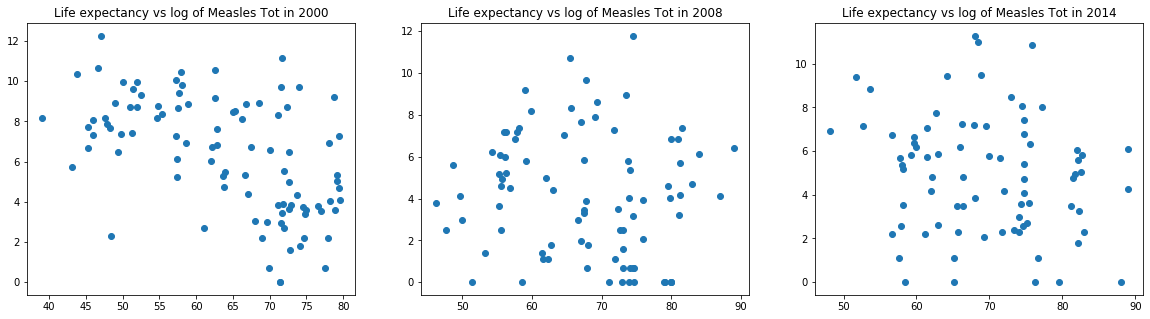

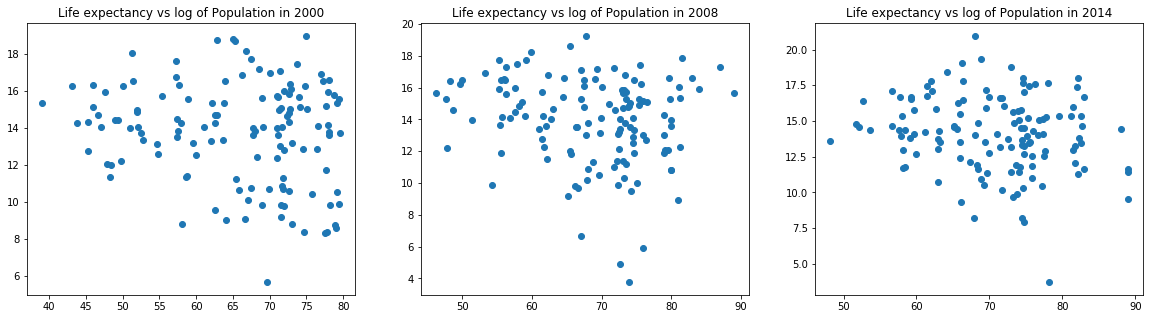

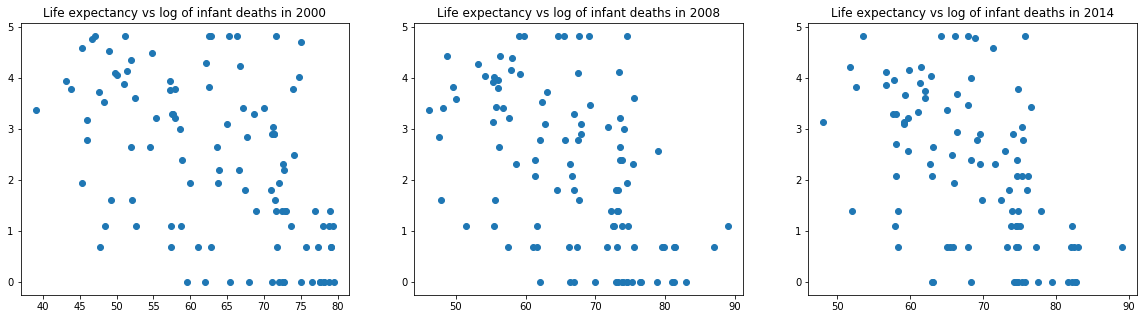

In [25]:
log_col = ['Measles Tot', 'Population', 'infant deaths']

df_log_2000 = df_log.loc[df_log['Year'] == 2000]
df_log_2008 = df_log.loc[df_log['Year'] == 2008]
df_log_2014 = df_log.loc[df_log['Year'] == 2014]

for col in log_col:
    fig = plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    plt.scatter(df_log_2000['Life expectancy '], df_log_2000[col])
    plt.title('Life expectancy vs log of {} in 2000'.format(col))
    
    plt.subplot(1,3,2)
    plt.scatter(df_log_2008['Life expectancy '], df_log_2008[col])
    plt.title('Life expectancy vs log of {} in 2008'.format(col))

    plt.subplot(1,3,3)
    plt.scatter(df_log_2014['Life expectancy '], df_log_2014[col])
    plt.title('Life expectancy vs log of {} in 2014'.format(col))

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.


In [26]:
corr_matrix = df.corr()
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles Tot,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinnes 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
Year,1.000000,0.171485,-0.072108,-0.047711,-0.046859,0.247259,-0.099554,-0.058038,0.117642,0.074139,0.166006,-0.142581,0.022775,-0.047477,-0.053483,0.242900,0.225046,-0.001429
Life expectancy,0.171485,1.000000,-0.660529,-0.410675,0.392617,0.249625,-0.138133,-0.461193,0.415188,0.199288,0.442943,-0.576373,-0.010840,-0.458724,-0.450095,0.726753,0.744703,-0.457526
Adult Mortality,-0.072108,-0.660529,1.000000,0.208837,-0.181469,-0.103382,-0.007269,0.238455,-0.208006,-0.096727,-0.210136,0.536273,-0.022403,0.278842,0.284581,-0.411010,-0.404160,0.286394
infant deaths,-0.047711,-0.410675,0.208837,1.000000,-0.249455,-0.188157,0.466698,0.991867,-0.281681,-0.213784,-0.268520,0.102836,0.327452,0.438187,0.443242,-0.322295,-0.432761,0.241069
Alcohol,-0.046859,0.392617,-0.181469,-0.249455,1.000000,0.106383,-0.029252,-0.256182,0.239854,0.227108,0.245454,-0.033756,-0.025556,-0.398731,-0.387087,0.532173,0.590261,-0.609023
Hepatitis B,0.247259,0.249625,-0.103382,-0.188157,0.106383,1.000000,-0.142059,-0.196138,0.451299,0.130435,0.552732,-0.104034,-0.092418,-0.166903,-0.181161,0.239386,0.268951,-0.108175
Measles Tot,-0.099554,-0.138133,-0.007269,0.466698,-0.029252,-0.142059,1.000000,0.461931,-0.113574,-0.111638,-0.119828,0.019600,0.269840,0.227961,0.223325,-0.137648,-0.146625,0.078270
under-five deaths,-0.058038,-0.461193,0.238455,0.991867,-0.256182,-0.196138,0.461931,1.000000,-0.308386,-0.205478,-0.297963,0.128030,0.304290,0.443592,0.445353,-0.359904,-0.474823,0.242547
Polio,0.117642,0.415188,-0.208006,-0.281681,0.239854,0.451299,-0.113574,-0.308386,1.000000,0.153724,0.680436,-0.132156,-0.026926,-0.204346,-0.205516,0.395265,0.437793,-0.228542
Total expenditure,0.074139,0.199288,-0.096727,-0.213784,0.227108,0.130435,-0.111638,-0.205478,0.153724,1.000000,0.166398,0.025389,-0.078289,-0.233957,-0.249369,0.194385,0.256340,-0.221800


In [27]:
df_pca = pd.DataFrame()
df_pca = df.drop(['Country', 'Status'], axis=1)

In [28]:
df_pca.shape

(1987, 18)

In [78]:
#df_pca.info()

In [30]:
scaled_df = StandardScaler().fit_transform(df_pca)

sklearn_pca = PCA(n_components=3)

df_pca['pca_1']  = sklearn_pca.fit_transform(scaled_df)[:,0]
df_pca['pca_2'] = sklearn_pca.fit_transform(scaled_df)[:, 1]
df_pca['pca_3'] = sklearn_pca.fit_transform(scaled_df)[:, 2]

sklearn_pca.explained_variance_ratio_

array([0.33736486, 0.11516582, 0.09348269])

In [58]:
corr_df = df_pca.corr()
corr_df[['Life expectancy ', 'pca_1', 'Diphtheria ', ' HIV/AIDS']].sort_values(by='Life expectancy ', ascending=False)

,Life expectancy,pca_1,Diphtheria,HIV/AIDS
Life expectancy,1.000000,-8.286763e-01,0.442943,-0.576373
Schooling,0.744703,-8.335953e-01,0.458794,-0.209940
Income composition of resources,0.726753,-7.776096e-01,0.436006,-0.242581
Diphtheria,0.442943,-5.825634e-01,1.000000,-0.142735
Polio,0.415188,-5.580514e-01,0.680436,-0.132156
Alcohol,0.392617,-5.871072e-01,0.245454,-0.033756
pca_2,0.309938,-9.565969e-11,0.225303,-0.357223
Hepatitis B,0.249625,-4.080390e-01,0.552732,-0.104034
Total expenditure,0.199288,-3.455621e-01,0.166398,0.025389
Year,0.171485,-2.052308e-01,0.166006,-0.142581


Based on the correlation matrix above we can try to narrow our variables down to a few variables that are correlated with Life expectancy but not necessarily with each other. We start by selecting pca_1 as our first feature. We then look to the corrleations with pca_1 and look for variables that are not too correlated with this feature, yet still significantly correlated with the life expectancy variable. The variable representing Diptheria vaxinations has a -.58 correlation with pca_1 but and has a .44 correlation with life expectancy. We pick this variable because it is also significantly related and correlated with the other vaxination variables for Hep B and Polio. This carries relevant information that we want our model to have. We will also pick the HIV/AIDS variable because it only has a correlation of .36 with pca_1 and -.14 with the Diptheria variable but has a stronger correlation (-.57) with life expectancy. We can use these three variables in our model. 


* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

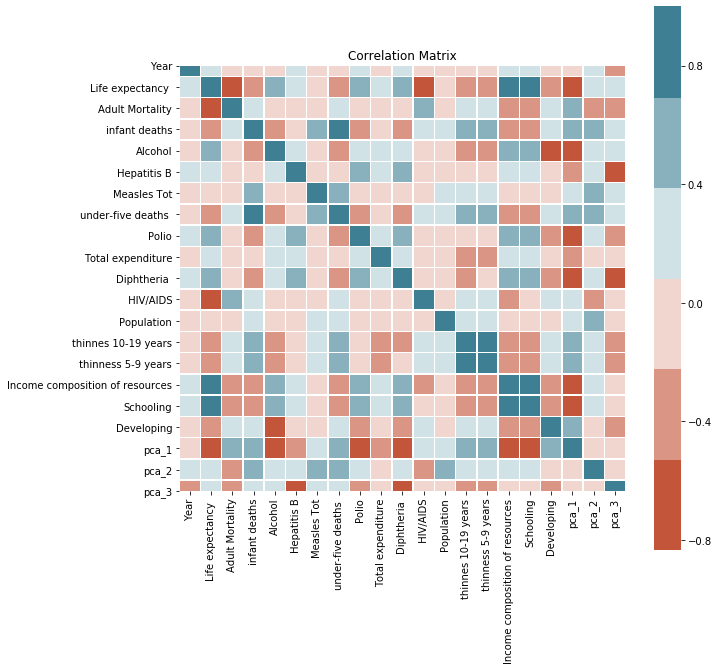

In [77]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr_df, 
    cmap=sns.diverging_palette(20, 220), 
    square=True,
    linewidths=.5).set_title('Correlation Matrix')